In [ ]:
!mkdir -p ~/.kaggle
!touch ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!echo '{"username":"rohitawate","key":"14a69194fa4cd4e37490796b1f37ff69"}' > ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kartik2112/fraud-detection
!unzip -o fraud-detection.zip

fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fraud-detection.zip
  inflating: fraudTest.csv           
  inflating: fraudTrain.csv          


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

master_df = pd.read_csv('fraudTrain.csv', index_col=0)
test_df = pd.read_csv('fraudTest.csv', index_col=0)
master_df['trans_date_trans_time'] = pd.to_datetime(master_df['trans_date_trans_time'])
master_df['trans_hour'] = master_df['trans_date_trans_time'].dt.hour
master_df['day_of_week'] = master_df['trans_date_trans_time'].dt.day_name()
master_df['year_month'] = master_df['trans_date_trans_time'].dt.to_period('M')


## About the Dataset
The dataset is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

## Data Description
<ul>
<li>trans_date_trans_time: date and time of the transaction</li>
<li>cc_num: credit card number of customer</li>
<li>merchant: customer is paying to which merchant(like Amazon,Walmart) ## category:</li>
<li>amt: the amount of transaction</li>
<li>first: first name of customer</li>
<li>last: last anme of customer</li>
<li>gender: gender of the customer</li>
<li>street, city, state: address of the customer</li>
<li>zip: zip code of the transaction</li>
<li>lat: latitude of the customer</li>
<li>long: longitude of customer</li>
<li>city_pop: population of the city he is living</li>
<li>job: job of cus</li>
<li>dob: date of birth of the customer</li>
<li>trans_num: unique transaction number for each and every </li><li>transaction</li>
<li>unix_time: time of the transaction in Unix( generally not used in our analysis as it is unique mostly)</li>
<li>merch_lat: merchant lattitude</li>
<li>merch_long: merchant longitude</li>
<li>is_fraud: whether transaction is fraud or no (1- fraud, 0- not fraud) </li>



In [ ]:
master_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01


In [ ]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

From the above, it is clear that there are no null values in the dataset. The dataset consists of 1.2M training samples and 21 features.

In [ ]:
master_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,trans_hour
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,1.280486e+01
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,6.817824e+00
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,7.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,1.400000e+01
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,1.900000e+01
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,2.300000e+01


## Skewness of Dataset:

In [ ]:
colors = ['lightgreen', 'darkred']
labels = ['Normal','Fraud']
values = master_df['is_fraud'].value_counts()/master_df['is_fraud'].shape[0]
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.3)])
# fig.figsize(10,10)
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Fraud", width=500, height=500
)
fig.show()

The transaction dataset contains approximately 0.6% fraudulent transactions.

In [ ]:
master_df.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
trans_hour                    24
day_of_week                    7
year_month                    18
dtype: int64

## Observations
We will perform the EDA on fraud transactions only and not on the entire dataset.

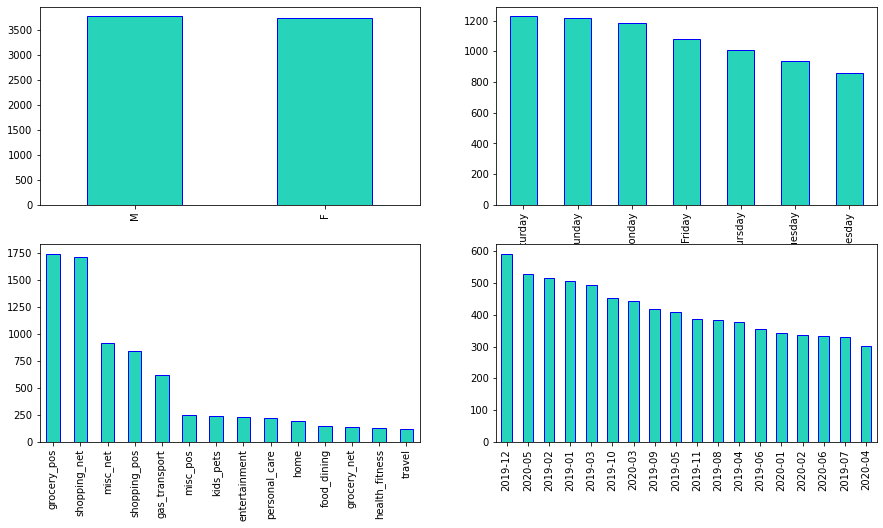

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
random_color = np.random.rand(3,)
master_df[master_df['is_fraud']==1]['gender'].value_counts().plot.bar(color=random_color, edgecolor='blue')
plt.subplot(2,2,2)
master_df[master_df['is_fraud']==1]['day_of_week'].value_counts().plot.bar(color=random_color, edgecolor='blue')
plt.subplot(2,2,3)
master_df[master_df['is_fraud']==1]['category'].value_counts().plot.bar(color=random_color, edgecolor='blue')
plt.subplot(2,2,4)
master_df[master_df['is_fraud']==1]['year_month'].value_counts().plot.bar(color=random_color, edgecolor='blue')

1. The frauds in credit cards is almost the same for Males and females.
2. Credit card fraud is dominant for grocery payments followed by online shopping payments and the least for travel payments.
3. Most of the fraud transactions take place on weekends.
4. December has the highest number of transactions and February has the lowest, which follows logical deduction, December being a holiday season.

Most of the transactions take place on Monday followed by Sunday, which is a bit counter-intuitive, since we expected the most transactions to be on weekends (Saturday/Sunday). However, it can be brushed aside by the fact that this is a synthesized dataset.

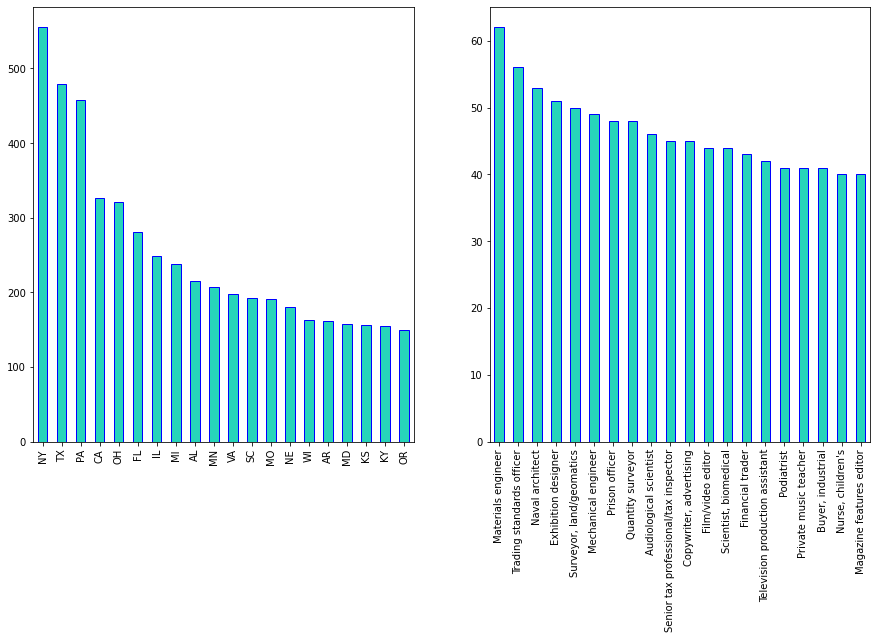

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
master_df[master_df['is_fraud']==1]['state'].value_counts().head(20).plot.bar(color=random_color, edgecolor='blue')
plt.subplot(1,2,2)
master_df[master_df['is_fraud']==1]['job'].value_counts().head(20).plot.bar(color=random_color, edgecolor='blue')

1. The largest number of fraud transactions take place in NY state, followed by TX and PA. 
2. The Materials Engineers are the most prone to fraudulent transactions.

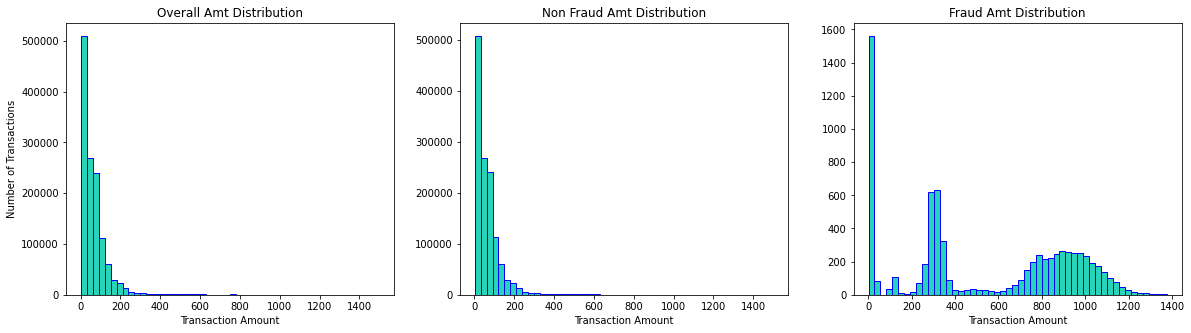

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(master_df[master_df['amt']<=1500]['amt'], bins=50, color=random_color, edgecolor='blue')
ax[1].hist(master_df[(master_df['is_fraud']==0) & (master_df['amt']<=1500)]['amt'], bins=50, color=random_color, edgecolor='blue')
ax[2].hist(master_df[(master_df['is_fraud']==1) & (master_df['amt']<=1500)]['amt'], bins=50, color=random_color, edgecolor='blue')

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('Number of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

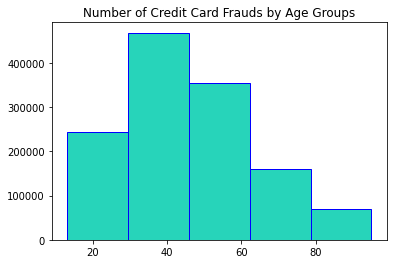

In [ ]:
fraud=master_df[master_df["is_fraud"]==1]
master_df["age"] = pd.to_datetime(master_df["trans_date_trans_time"])-pd.to_datetime(master_df["dob"])
master_df["age"]=master_df["age"].astype('timedelta64[Y]')
master_df["age"].head()
raud=master_df[master_df["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(master_df.age, color=random_color, edgecolor='blue', bins = 5)
plt.title("Number of Credit Card Frauds by Age Groups")
plt.show()


In [ ]:
import plotly.express as px
plt.figure(figsize=(20,20))
corr=master_df.corr().round(1)
fig = px.imshow(corr)
fig.update_layout(
    title_text="Credit Card Fraud",
)
fig.show()

<Figure size 1440x1440 with 0 Axes>